In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\Users\saurav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("output.csv")
df.head()

c:\Users\saurav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.shape

(855969, 73)

In [4]:
#function to find missing Value
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    #percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    #missing_data = pd.concat([total, percent], axis=1, keys=['In Total', 'In Percentage'])
    missing_data = pd.concat([total], axis=1, keys=['In Numbers'])
    return(missing_data)

In [4]:
missing_data(df)

,In Numbers
dti_joint,855529
annual_inc_joint,855527
verification_status_joint,855527
il_util,844360
mths_since_rcnt_il,843035
...,...
out_prncp,0
out_prncp_inv,0
member_id,0
total_pymnt_inv,0


In [5]:
# removing columns with more Null values like of somthing >(855969/2) 
lis_df_1=df.isnull().sum()
for i in range(len(lis_df_1)):
    if lis_df_1[i]>(855969/2):
        del df['{}'.format(lis_df_1.index[i])]

In [6]:
df.shape

(855969, 52)

In [7]:
missing_data(df)

,In Numbers
next_pymnt_d,252971
total_rev_hi_lim,67313
tot_cur_bal,67313
tot_coll_amt,67313
emp_title,49443
emp_length,43061
last_pymnt_d,8862
revol_util,446
collections_12_mths_ex_med,56
last_credit_pull_d,50


In [7]:
# dropping unwanted columns and which i feel not required.
df=df.drop(['next_pymnt_d','total_rev_hi_lim','tot_cur_bal','tot_coll_amt','emp_title','id','member_id',
'earliest_cr_line','zip_code','last_pymnt_d','policy_code'],axis=1)

In [8]:
df.shape

(855969, 41)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   term                        855969 non-null  object 
 4   int_rate                    855969 non-null  float64
 5   installment                 855969 non-null  float64
 6   grade                       855969 non-null  object 
 7   sub_grade                   855969 non-null  object 
 8   emp_length                  812908 non-null  object 
 9   home_ownership              855969 non-null  object 
 10  annual_inc                  855969 non-null  float64
 11  verification_status         855969 non-null  object 
 12  issue_d                     855969 non-null  object 
 13  pymnt_plan    

In [9]:
missing_data(df)

,In Numbers
emp_length,43061
revol_util,446
collections_12_mths_ex_med,56
last_credit_pull_d,50
title,33
total_rec_prncp,0
total_acc,0
initial_list_status,0
out_prncp,0
out_prncp_inv,0


In [8]:
#feature enginearing on last_credit_pull_d feature
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
df['Month'] = df['last_credit_pull_d'].apply(lambda x: x.month)
df['Year'] = df['last_credit_pull_d'].apply(lambda x: x.year)
df = df.drop(['last_credit_pull_d'], axis = 1)

In [9]:
#imputing missing value with mode value 
df['Month'].fillna(df.mode()['Month'][0],inplace=True)
df['Year'].fillna(df.mode()['Year'][0],inplace=True)

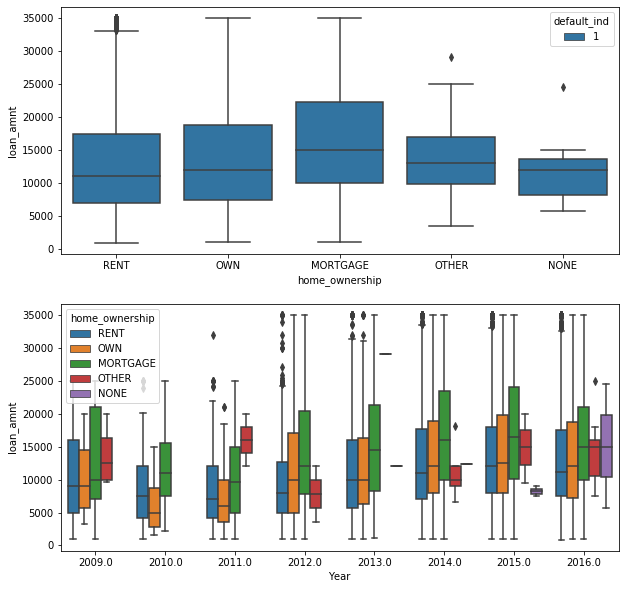

In [10]:
defaulter = df.loc[df['default_ind']==1]
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(data=defaulter,x = 'home_ownership',y='loan_amnt',hue='default_ind')
plt.subplot(212)
sns.boxplot(data=defaulter,x='Year',y='loan_amnt',hue='home_ownership')

In [13]:
df.title.value_counts()

Debt consolidation           398089
Credit card refinancing      159228
Home improvement              38633
Other                         30522
Debt Consolidation            15469
                              ...  
Unique Loan                       1
FINALLY HOPE                      1
Credit Card Debt be Gone!         1
get this debt paid off            1
Credit Card/Auto Repair           1
Name: title, Length: 60991, dtype: int64

In [12]:
#to impute missing na value with debt_consolidation because its is most repeted value
df['title'].fillna('Debt consolidation ',inplace=True)

In [30]:
## converting dtypes of columns

In [15]:
df.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [13]:
df.term=df.term.str.extract('(\d+)')
term_list={'36':0,'60':1}
df.term=[term_list[item]for item in df.term]
df.term.value_counts()

0    600221
1    255748
Name: term, dtype: int64

In [17]:
df.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [14]:
df=df.replace(to_replace='10+ years',value=10)
df=df.replace(to_replace='1 year',value=1)
df=df.replace(to_replace='2 years',value=2)
df=df.replace(to_replace='3 years',value=3)
df=df.replace(to_replace='4 years',value=4)
df=df.replace(to_replace='5 years',value=5)
df=df.replace(to_replace='6 years',value=6)
df=df.replace(to_replace='7 years',value=7)
df=df.replace(to_replace='8 years',value=8)
df=df.replace(to_replace='9 years',value=9)
df=df.replace(to_replace='< 1 year',value=0.5)

In [15]:
df.emp_length.value_counts()

10.0    282090
2.0      75986
0.5      67597
3.0      67392
1.0      54855
5.0      53812
4.0      50643
7.0      43204
8.0      42421
6.0      41446
9.0      33462
Name: emp_length, dtype: int64

In [20]:
df.grade.value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [16]:
grade_list={'A':1,'B':2,'C':3,'D':4,'E':4,'F':5,'G':6}
df.grade=[grade_list[item]for item in df.grade]
df.grade.value_counts()

2    247998
3    236855
4    199250
1    145665
5     21328
6      4873
Name: grade, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['sub_grade'] = le.fit_transform(df['sub_grade'])
df.sub_grade.value_counts()

7     54958
8     54116
10    51588
11    50457
12    48337
6     47589
9     47333
13    46941
5     44002
4     43957
14    39532
15    34667
3     33991
16    28385
17    25289
18    24253
2     23095
0     22516
1     22106
19    20208
20    17230
21    15994
22    13294
23    11011
24     8919
25     6702
26     4979
27     4099
28     3168
29     2380
30     1698
31     1259
32      877
33      570
34      469
Name: sub_grade, dtype: int64

In [19]:
df.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [20]:
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df.home_ownership.value_counts()

1    429106
5    342535
4     84136
3       144
2        45
0         3
Name: home_ownership, dtype: int64

In [21]:
df.verification_status.value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [22]:
df['verification_status'] = le.fit_transform(df['verification_status'])
df.verification_status.value_counts()

1    318178
2    280049
0    257742
Name: verification_status, dtype: int64

In [23]:
df.pymnt_plan.value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [24]:
df['pymnt_plan'] = le.fit_transform(df['pymnt_plan'])
df.pymnt_plan.value_counts()

0    855964
1         5
Name: pymnt_plan, dtype: int64

In [25]:
df.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [26]:
df['purpose'] = le.fit_transform(df['purpose'])
df.purpose.value_counts()

2     505392
1     200144
4      49956
9      40949
6      16587
11      9785
0       8593
7       8193
8       5160
12      4542
5       3513
13      2280
10       549
3        326
Name: purpose, dtype: int64

In [27]:
df.title.value_counts()

Debt consolidation           398089
Credit card refinancing      159228
Home improvement              38633
Other                         30522
Debt Consolidation            15469
                              ...  
Unique Loan                       1
FINALLY HOPE                      1
Credit Card Debt be Gone!         1
get this debt paid off            1
Credit Card/Auto Repair           1
Name: title, Length: 60991, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   term                        855969 non-null  int64  
 4   int_rate                    855969 non-null  float64
 5   installment                 855969 non-null  float64
 6   grade                       855969 non-null  int64  
 7   sub_grade                   855969 non-null  int32  
 8   emp_length                  812908 non-null  float64
 9   home_ownership              855969 non-null  int32  
 10  annual_inc                  855969 non-null  float64
 11  verification_status         855969 non-null  int32  
 12  issue_d                     855969 non-null  object 
 13  pymnt_plan    

In [34]:
df.addr_state.value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

In [28]:
df['addr_state'] = le.fit_transform(df['addr_state'])
df.addr_state.value_counts()

4     125172
34     71114
43     68708
9      58639
14     34379
31     32061
38     30250
35     28651
10     28043
45     25234
27     23787
22     22175
20     20209
19     19835
3      19693
47     18816
5      18211
23     15424
24     13743
15     13348
6      13042
42     12392
33     11972
48     11199
1      10732
37     10562
40     10302
18     10186
17      8299
36      7759
16      7693
2       6399
44      6055
32      4757
11      4380
49      4247
30      4156
39      3753
25      3653
26      2466
8       2402
7       2382
0       2134
50      1974
46      1753
41      1745
29      1124
21       491
28       452
13         9
12         7
Name: addr_state, dtype: int64

In [29]:
df.initial_list_status.value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [30]:
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])
df.initial_list_status.value_counts()

0    442555
1    413414
Name: initial_list_status, dtype: int64

In [31]:
df.application_type.value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [32]:
df['application_type'] = le.fit_transform(df['application_type'])
df.application_type.value_counts()

0    855527
1       442
Name: application_type, dtype: int64

In [33]:
missing_data(df)

,In Numbers
emp_length,43061
revol_util,446
collections_12_mths_ex_med,56
total_rec_int,0
total_acc,0
initial_list_status,0
out_prncp,0
out_prncp_inv,0
total_pymnt,0
total_pymnt_inv,0


#model building

In [34]:
df['emp_length'].fillna(1,inplace=True)

In [35]:
df = df.dropna()

In [36]:
df['last']=df['default_ind']
del df['default_ind']
df['default_ind']=df['last']
del df['last']

In [37]:
# droppping two more object columns
del df['issue_d']
del df['title']

In [38]:
df.shape

(855467, 40)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855467 entries, 0 to 855968
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855467 non-null  float64
 1   funded_amnt                 855467 non-null  float64
 2   funded_amnt_inv             855467 non-null  float64
 3   term                        855467 non-null  int64  
 4   int_rate                    855467 non-null  float64
 5   installment                 855467 non-null  float64
 6   grade                       855467 non-null  int64  
 7   sub_grade                   855467 non-null  int32  
 8   emp_length                  855467 non-null  float64
 9   home_ownership              855467 non-null  int32  
 10  annual_inc                  855467 non-null  float64
 11  verification_status         855467 non-null  int32  
 12  pymnt_plan                  855467 non-null  int32  
 13  purpose       

# Splitting of Data

In [39]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

X.shape, y.shape

((855467, 39), (855467,))

In [45]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, accuracy_score, average_precision_score,roc_auc_score
from sklearn.metrics import f1_score,roc_curve,recall_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
import xgboost as xgb

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# RandomForest Classifier

In [42]:
lr=RandomForestClassifier(n_estimators=10, criterion='entropy')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_prob=lr.predict_proba(X_test)

In [43]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[202292      1]
 [   443  11131]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    202293
           1       1.00      0.96      0.98     11574

    accuracy                           1.00    213867
   macro avg       1.00      0.98      0.99    213867
weighted avg       1.00      1.00      1.00    213867



In [46]:
#model on train using all the independent values in df
rfc_prediction = lr.predict(X_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

accuracy Score on train using RandomForest : 0.999552680798005


# decsion Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
#model on train using all the independent values in df
dec_prediction = dec.predict(X_train)
dec_score= accuracy_score(y_train,dec_prediction)
print('Accuracy score on train using Decision Tree :',dec_score)

Accuracy score on train using Decision Tree : 1.0


In [70]:
y_pred_dt=dec.predict(X_test)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[201952    443]
 [   364  11108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    202395
           1       0.96      0.97      0.96     11472

    accuracy                           1.00    213867
   macro avg       0.98      0.98      0.98    213867
weighted avg       1.00      1.00      1.00    213867



In [49]:
# ada boosting classifier
from sklearn.ensemble import AdaBoostClassifier
ada =AdaBoostClassifier(n_estimators=100)

In [50]:
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [51]:
#model on train using all the independent values in df
ada_prediction = ada.predict(X_train)
ada_score= accuracy_score(y_train,ada_prediction)
print('Accuracy score on train using AdaBoost :',ada_score)

Accuracy score on train using AdaBoost : 0.9955938279301746


In [52]:
print(confusion_matrix(y_train, ada_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_train,ada_prediction)
print("AUC on train using AdaBoost :",metrics.auc(fpr, tpr))
average_precision = average_precision_score(y_train, ada_prediction)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('recall_score on train set :',recall_score(y_train, ada_prediction))
print('F1_sccore on train set :',f1_score(y_train, ada_prediction))
print('classification report on train using Extra tree ',classification_report(y_train,ada_prediction))

[[606618    143]
 [  2684  32155]]
AUC on train using AdaBoost : 0.9613621118104729
Average precision-recall score: 0.92
recall_score on train set : 0.9229599012600821
F1_sccore on train set : 0.9578920714360188
classification report on train using Extra tree                precision    recall  f1-score   support

           0       1.00      1.00      1.00    606761
           1       1.00      0.92      0.96     34839

    accuracy                           1.00    641600
   macro avg       1.00      0.96      0.98    641600
weighted avg       1.00      1.00      1.00    641600



In [53]:
# logictics regression
log =LogisticRegression()
log.fit(X_train,y_train)

c:\Users\saurav\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [54]:
log_prediction = log.predict(X_train)
log_score= accuracy_score(y_train,log_prediction)
print('Accuracy score on train set using Logistic Regression :',log_score)

Accuracy score on train set using Logistic Regression : 0.9975420822942643
